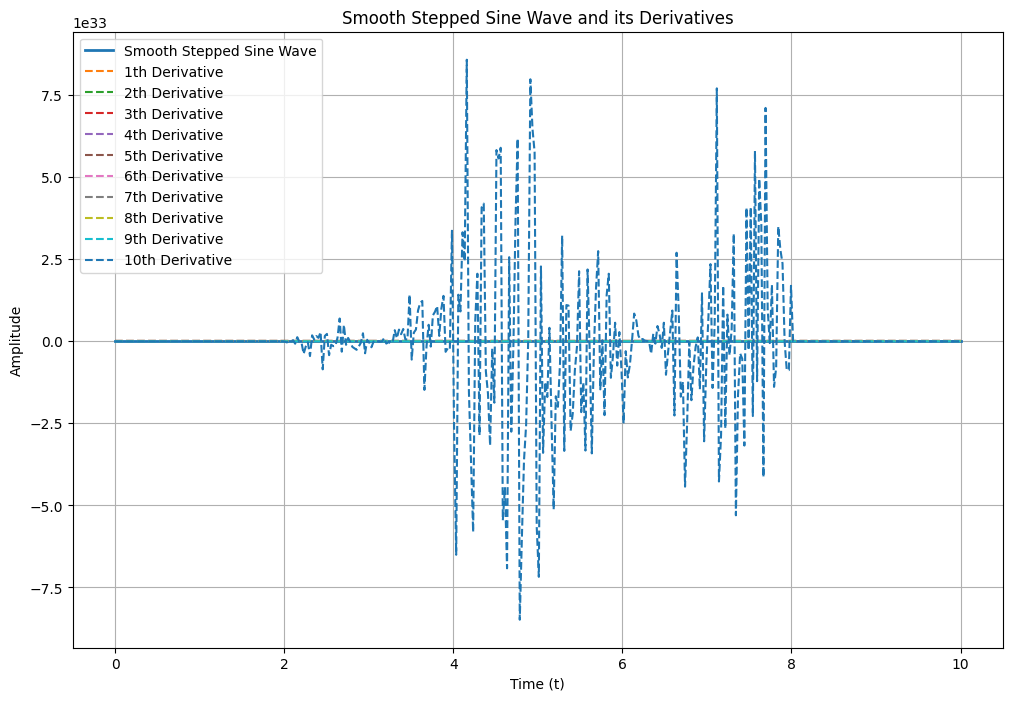

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Define the Bernstein polynomial
def bernstein_poly(i, n, t):
    return comb(n, i) * (t ** i) * ((1 - t) ** (n - i))

# Define the 11th-degree Bézier curve smooth step function
def smoothstep_bezier(t, t1=0, t2=1):
    # Normalize t to the range [0, 1]
    t = np.clip((t - t1) / (t2 - t1), 0, 1)
    n = 11
    return sum(bernstein_poly(i, n, t) * (i / n) for i in range(n + 1))

# Define the derivative function
def derivative(f, t, dt=1e-5):
    return (f(t + dt) - f(t - dt)) / (2 * dt)

# Parameters
t1 = 2  # Start time
t2 = 8  # End time
t = np.linspace(0, 10, 400)  # Time vector

# Calculate the smooth stepped sine wave
sine_wave = np.sin(t)
smooth_sine_wave = sine_wave * smoothstep_bezier(t, t1, t2)

# Calculate derivatives
n_orders = 10  # Number of derivatives to calculate
derivatives = [smooth_sine_wave]
current_func = lambda t: sine_wave * smoothstep_bezier(t, t1, t2)
for _ in range(1, 4):
    current_func = lambda t, f=current_func: derivative(f, t)
    derivatives.append(current_func(t))

# Plot the original sine wave and the smooth stepped sine wave
plt.figure(figsize=(12, 8))
plt.plot(t, derivatives[0], label='Smooth Stepped Sine Wave', linewidth=2)
for n in range(1, n_orders + 1):
    plt.plot(t, derivatives[n], label=f'{n}th Derivative', linestyle='dashed')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.title('Smooth Stepped Sine Wave and its Derivatives')
plt.legend()
plt.grid(True)
plt.show()
